# Introduction
The motivation behind this notebook is to determine how strong a password is. And not just by looking at entropy analysis or how complex a password is, but by looking at the correlation of password strength and how it varies when compared against a number of different categories which we can categorize the password string by.

# Background Research and Hypothesis
It is so often said to us that we should use passwords that are not common words. But let's say my password is 'klo$0', instead of what I would usually use (not) 'y@tin'.

Both these passwords are 5 characters each. The idea is that a computer program can probably guess these passwords in an insignificant amount of time can be worrying. Let's just try it ourselves and see how long it would take for a computer to find these two passwords:

In [1]:
import time
import string
import random

# all the characters that can be used in a password
all_chars = string.ascii_uppercase + string.ascii_lowercase + string.punctuation + string.digits
slen = len(all_chars)
# calculating time for random 5 character string:
start_rand = time.time()
check = ''.join(random.choice(all_chars) for _ in range(5))
end_rand = time.time()
elapsed = end_rand - start_rand
print("It took {0:.10f} seconds to guess a random 5 character string from a range of characters {1} characters long".format(elapsed, slen))

It took 0.0001959801 seconds to guess a random 5 character string from a range of characters 94 characters long


We know that there are 5 possibilities, and we also know that there are 94 characters to chose from. So we can have 94^6 possible combinations of possible 6 character strings. As such, we can multiply the number of combinations with the amount of time it takes to compute one combination, and find out how much time (years) it would have at most taken to guess a random password of 5 characters. 

In [2]:
pos = 94 ** 5
total = pos * elapsed # total time taken
days = total / 86400 # seconds to days conversion
years = days / 365 # days to years conversion
print("It will take at most {0:.5} years to guess your 5 character password!".format(years))

It will take at most 0.045608 years to guess your 5 character password!


So if I don't change my password every few weeks, it could potentially be hacked. Now obviously my password is not that low, because let's observe what happens when we change the number of characters in the password from 5 to 12.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

# define function to check for how long it would take to generate passowrd of n characters
pass_speeds = [] # parallel lists keeping track of speeds and corresponding number of chars
num_chars = []
def guess(n):
    check = ''.join(random.choice(all_chars) for _ in range(n))
    pos = 94 ** n
    total = pos * elapsed # total time taken
    days = total / 86400 # seconds to days conversion
    years = days / 365 # days to years conversion
    years = float("{0:.2f}".format(years))
    num_chars.append(str(n) + " characters")
    pass_speeds.append(str(years) + " years")


# call function from ranges of 5 to 12 to populate dictionary with values
for i in range(5,13):
    guess(i)

# create data frame with speeds of corresponding password lengths
speeds = pd.DataFrame({"time taken to crack": pass_speeds, "length of password": num_chars})

Look at that, the longer your password is, the longer it will take to crack it using a computer. At this point it is probably right to think that it might be a bit overkill to make a password of anything near 9 characters. But remember that these operations can be made easier with synchronization of more than one computer together, and these computers that which can probably operate at much, much higher speeds than mine. This website https://www.password-depot.com/know-how/brute-force-attacks.htm shows to us that in the http://www.distributed.net/RC5/en project, multiple contributors can try up to a total of 800 billion keys per second. And this drastically decreases the amount of time needed to crack passwords of a length between 5-12.

In [4]:
import urllib
from bs4 import BeautifulSoup
from IPython.display import display, HTML

url = "https://www.password-depot.com/know-how/brute-force-attacks.htm"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml') # getting html tags
table = soup.find('table', {'stdbl': ''}) # finding table with data 
char_speeds = {} # dictionary to extract password length and corresponding time to crack from table

rows = table.findChildren('p') # all the text in the table
# looping through the row to extract just the password length and time taken to extract
times = []
for cell in rows:
    times.append(cell.findAll("strong"))

# clean the list from the empty items
times = [x for x in times if len(x) != 0]

# loop and create the dictionary with keys and values representing password length and time taken to crack that password
sent = 0
while True:
    pl = str(times[sent])[9:-10]
    sent += 1
    tt = str(times[sent])[9:-10]
    char_speeds[pl] = tt
    sent += 1
    if sent == len(times):
        break
        
from IPython.display import display, HTML

HTML('<style>{}</style>'.format(CSS))

# make new dataframe showing the relationship
chsp = pd.DataFrame({"length of password": list(char_speeds.keys()),
                     "time taken to crack": list(char_speeds.values())})
print("at 800 billion keystrokes per second data\n","-----------------------")
display(chsp)
print("at my computer's speed\n","-----------------------")
display(speeds)

at 800 billion keystrokes per second data
 -----------------------


,length of password,time taken to crack
0,5 characters,0.03 seconds
1,7 characters,"approx, 9 minutes"
2,8 characters,"approx, 2,6 days"
3,9 characters,"approx, 9,1 years"
4,12 characters,"approx, 7,5 million years"


at my computer's speed
 -----------------------


,length of password,time taken to crack
0,5 characters,0.05 years
1,6 characters,4.29 years
2,7 characters,403.0 years
3,8 characters,37881.58 years
4,9 characters,3560868.93 years
5,10 characters,334721679.52 years
6,11 characters,31463837874.51 years
7,12 characters,2957600760203.73 years


It is clearly notable that even though it takes a signifcantly smaller amount of time to crack these passwords, given the proper resources. One that still stands out is the 12 character password, and this pretty much reinforces that if you have a 12 character password you are safe. But is this feature really being used? We can go through a sample of 61000+ passwords and check how many are actually over this limit.

*transition to analysis of actual dataset, after stating hypothesis*

In [40]:
p = pd.read_csv('8-more-passwords.txt', delim_whitespace=True, header=None) # reading csv with passwords
p.columns = ['Passwords']

In [41]:
# add lists categorizing the different types of chars
rHand = "6^7&8*9(0)-_=+yYuUiIoOpP[{]}\|hHjJkKlL;:'nNmM,<.>/?" # chars typed by right hand
lHand = "1!2@3#4$5%qwertasdfgzxcvbQWERTASDFGZXCVB" # chars typed by left hand
punc_in = string.punctuation # special characters (punctuation)
nums_in = "1234567890" # all the numbers
vows_in = "aeiouAEIOU" # all the vowels

After extracting the passwords from the text file, it is easy to then make lists of characters that categorize different traits for a string. So can then add the corresponding columns of these lists by looping through the passwords and adding up how many times each char falls into the categories.

In [42]:
# dicts for each category of char
keys = np.arange(61682)
right = dict(zip(keys, [0] * len(keys)))
left = dict(zip(keys, [0] * len(keys)))
punctuations = dict(zip(keys, [0] * len(keys)))
numbers = dict(zip(keys, [0] * len(keys)))
vowels = dict(zip(keys, [0] * len(keys)))
length = dict(zip(keys, [0] * len(keys)))
upper = dict(zip(keys, [0] * len(keys)))
lower = dict(zip(keys, [0] * len(keys)))
# list that contains these dicts
    
sent = 0 # sentinel keeps track of index in dicts
for i in p.loc[:, "Passwords"]:
    length[sent] = len(i)
    for char in i:
        if char in rHand:
            right[sent] += 1
        if char in lHand:
            left[sent] += 1
        if char in punc_in:
            punctuations[sent] += 1    
        if char in nums_in:
            numbers[sent] += 1 
        if char in vows_in:
            vowels[sent] += 1 
        if char.islower():
            lower[sent] += 1
        if char.isupper():
            upper[sent] += 1
    sent += 1

p["Length"] = pd.Series(length)
p["Right Hand"] = pd.Series(right)
p["Left Hand"] = pd.Series(left)
p["Puncuations"] = pd.Series(punctuations)
p["Numbers"] = pd.Series(numbers)
p["Vowels"] = pd.Series(vowels)
p["Uppercase"] = pd.Series(upper)
p["Lowercase"] = pd.Series(lower)
print("passwords data\n","-----------------------")
display(p.head())

passwords data
 -----------------------


,Passwords,Length,Right Hand,Left Hand,Puncuations,Numbers,Vowels,Uppercase,Lowercase
0,Ainslie1,8,4,4,0,1,4,1,6
1,146Dudley,9,4,5,0,3,2,1,5
2,Amanda94,8,3,5,0,2,3,1,5
3,Ambrose1,8,2,6,0,1,3,1,6
4,Yorkshire1,10,5,5,0,1,3,1,8


We can now plot this data to find how many passwords are "crackable" in a relatively unsafe amount of time. Anything more than around 10-11 characters is probably safe from a brute-force method of being cracked. 

length of the average passowrd is: 8.98 characters


8     33803
10    11337
9      9461
11     3339
12     1903
13      962
14      453
15      232
16      120
17       28
19       21
18       15
20        4
7         4
Name: Length, dtype: int64

passwords of length 8 make up 54.80% of all of the passwords


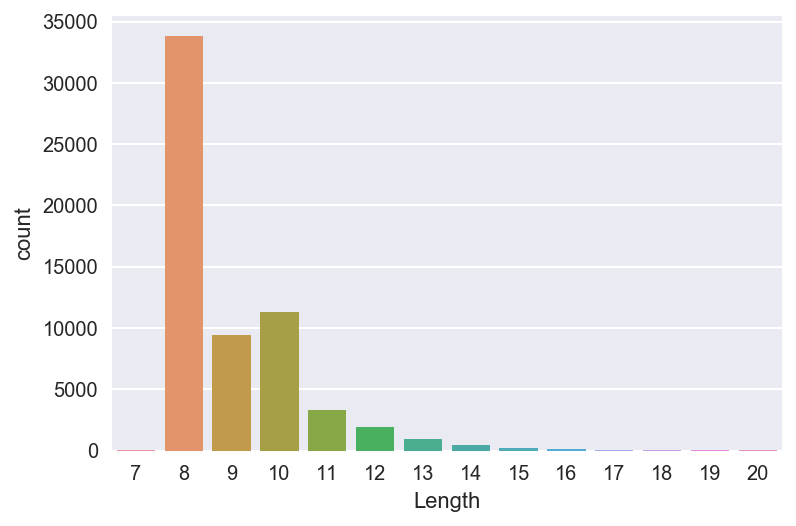

In [43]:
# graping with seaborn
sns.countplot(data=p, x="Length")
print("length of the average passowrd is: {0:.2f} characters".format(np.mean(p.Length)))
occ = p.Length.value_counts()
display(occ)
print("passwords of length 8 make up {0:.2f}% of all of the passwords".format(100*occ[8]/len(p)))